In [26]:
from sklearn import *
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [10]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [12]:
model = LogisticRegression().fit(X_train, y_train)

In [13]:
y_pred_proba = model.predict_proba(X_test)

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

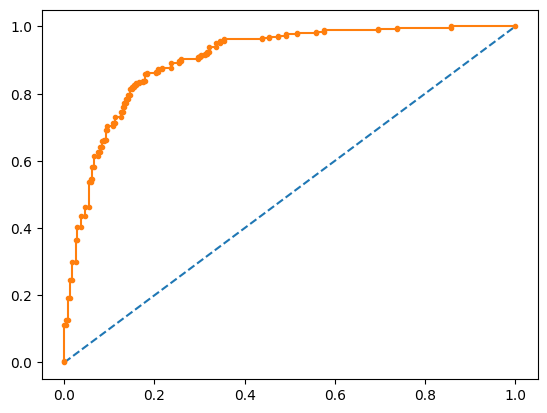

In [15]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [20]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9027724358974359

In [27]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

ValueError: Found input variables with inconsistent numbers of samples: [200, 500]

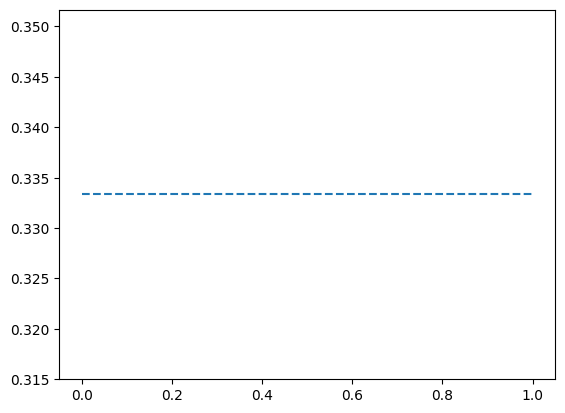

In [28]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

In [29]:
plt.plot(recall, precision, marker='.')
plt.show()

NameError: name 'recall' is not defined

На реальном датасете для бинарной классификации используйте кривые для сравнения нескольких видов моделей между собой (изобразите кривые разных моделей на одном графике). Сделайте вывод о том, какая модель будет лучше работать с учетом оптимизации порога.

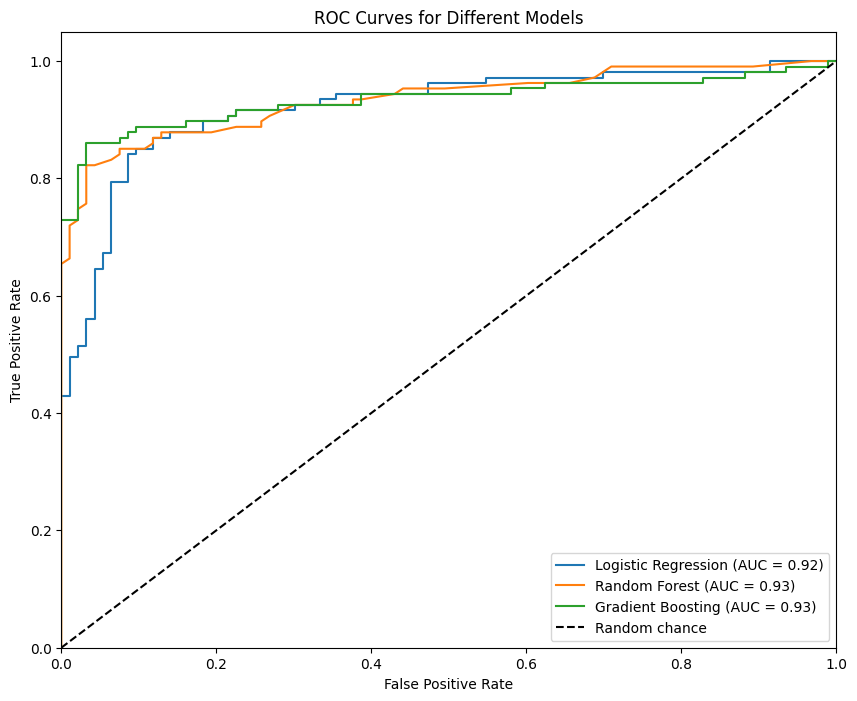

In [21]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

plt.figure(figsize=(10, 8))


for name, model in models:
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()


Повторите предыдущее задание, но для задачи множественной классификации. Выберите два датасета: один с относительно равным распределением классов, а второй - с близким к экспоненциальному, с большим неравенством классов. Продемонтрируйте разницу в поведении моделей на разных кривых.

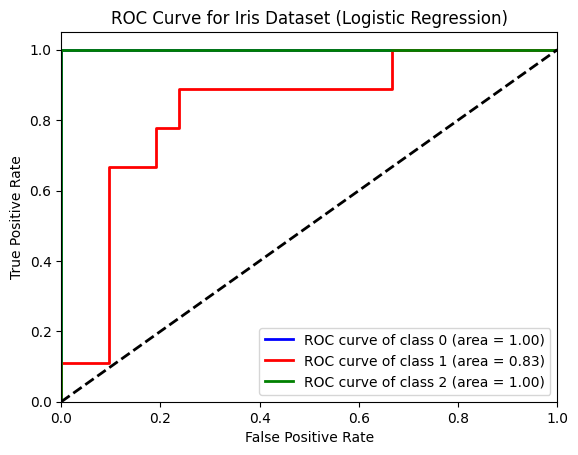

In [24]:
X, y = load_iris(return_X_y=True)

y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]


X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)


classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Iris Dataset (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()
